In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [10]:
train= pd.read_csv(r'train_2016_v2.csv')

In [2]:
Raw_data=pd.read_csv(r'properties_2016.csv')

C:\Users\wii\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Raw_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [9]:
Raw_data.isnull().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [11]:
final_df=Raw_data.copy()

In [13]:
final_df=final_df.merge(train, how='inner' ,on='parcelid')

In [15]:
final_df.shape

(90275, 60)

In [16]:
dummy_df=final_df.copy()

In [18]:
dummy_df.isnull().sum()

parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar

# checking number of missing values

In [20]:
mis_val=[var for var in dummy_df.columns if dummy_df[var].isnull().sum()]
dummy_df[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

# Numeric Variables


In [23]:
num_var=[var for var in dummy_df.columns if dummy_df[var].dtypes!='O']
print(len(num_var),' numerical variables')

54  numerical variables


# Categorical Variables

In [30]:
cat_var=[var for var in dummy_df.columns if dummy_df[var].dtypes=="O"]
print(len(cat_var) ,'categorical variables')

6 categorical variables


# number of categories

In [37]:
for var in cat_var:
    print(var , len(dummy_df[var].unique()) , "categories")

hashottuborspa 2 categories
propertycountylandusecode 78 categories
propertyzoningdesc 1997 categories
fireplaceflag 2 categories
taxdelinquencyflag 2 categories
transactiondate 352 categories


# temporal

In [38]:
year_var = [var for var in num_var if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

In [41]:
new_df=dummy_df.copy()

In [42]:
new_df[var]=new_df['assessmentyear'] - new_df['yearbuilt']

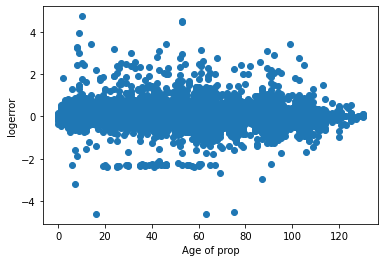

In [43]:
plt.scatter(new_df[var],new_df['logerror'])
plt.xlabel('Age of prop')
plt.ylabel('logerror')
plt.show()

# discrete and contineous variables

In [45]:
dis_var=[var for var in num_var if len(dummy_df[var].unique())<20]
print(len(dis_var),'variables')

26 variables


In [47]:
con_var=[var for var in num_var if var not in dis_var+year_var]
print(len(con_var),'variables')

27 variables


# checking distribtion of contineous variables

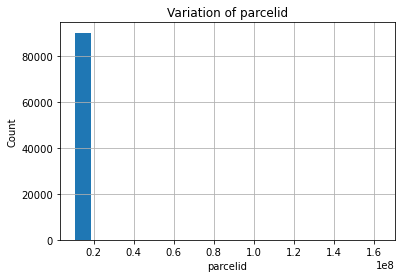

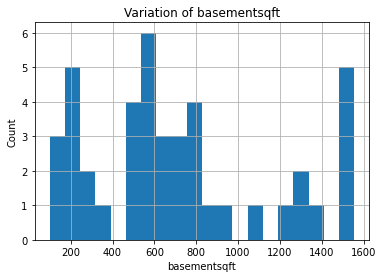

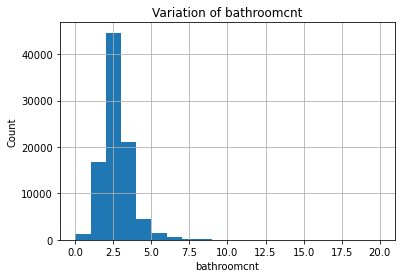

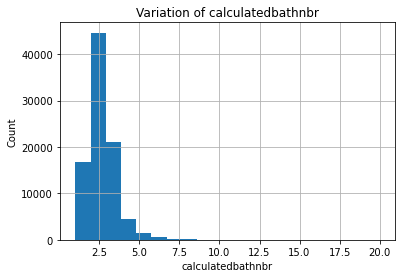

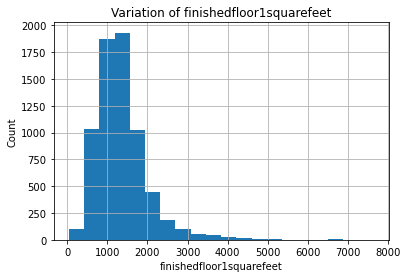

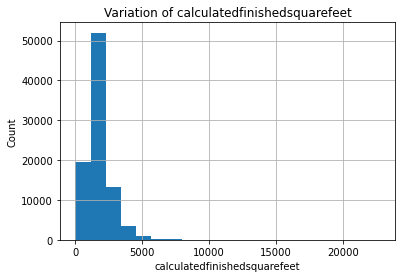

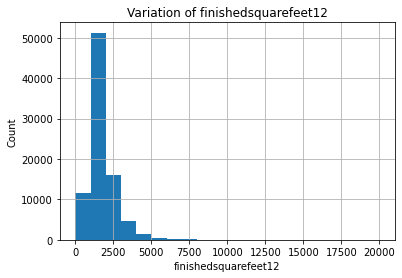

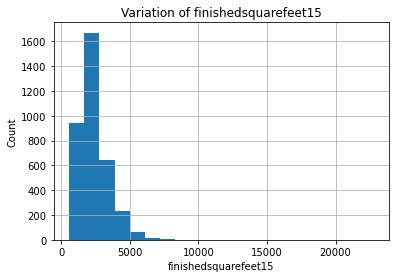

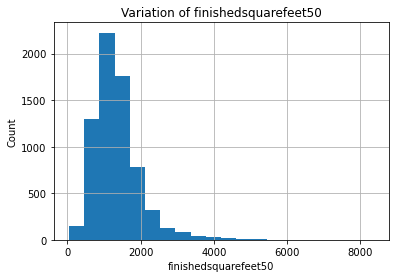

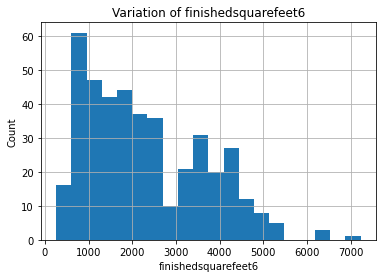

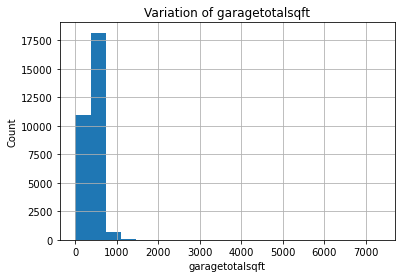

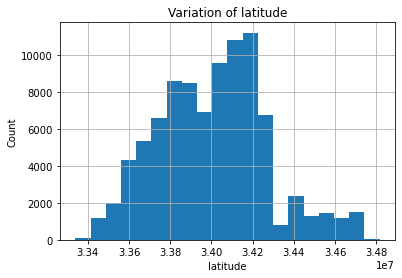

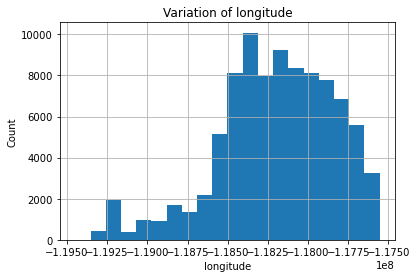

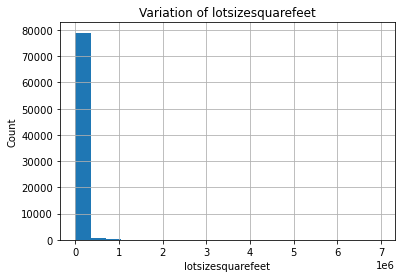

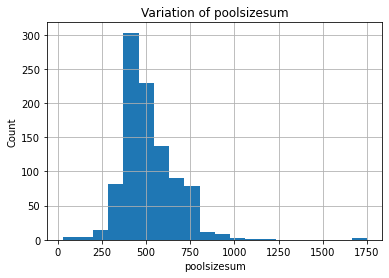

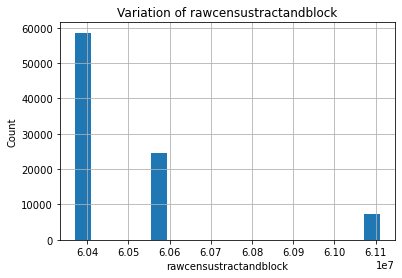

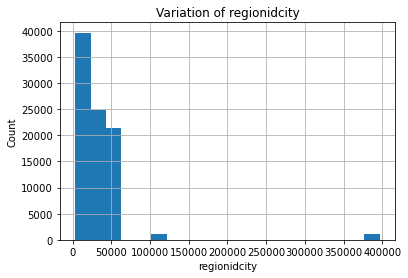

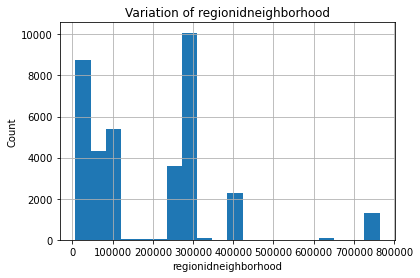

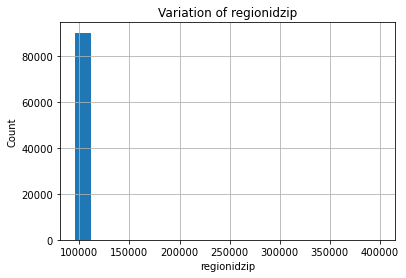

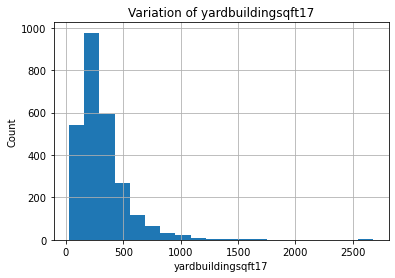

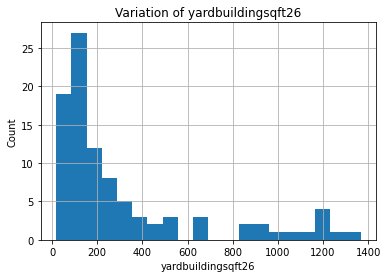

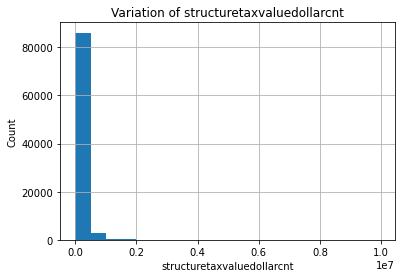

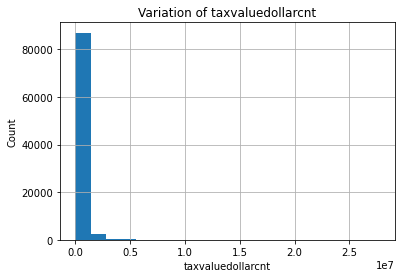

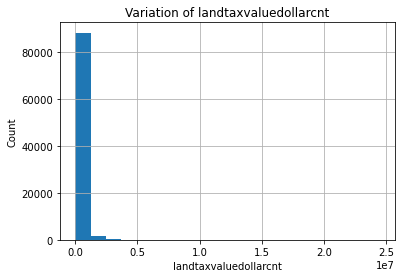

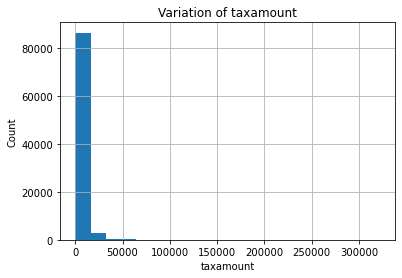

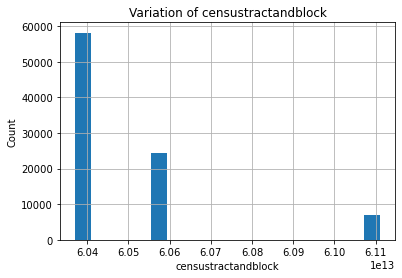

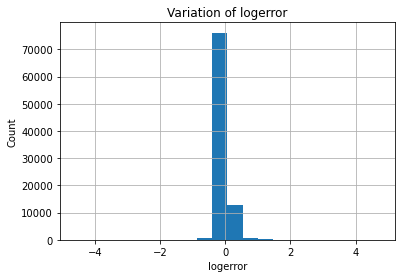

In [50]:
def distribution_cont(df,var):
    new_df=dummy_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in con_var:
    distribution_cont(dummy_df,var)

# Evaluation of logarthmic transformation

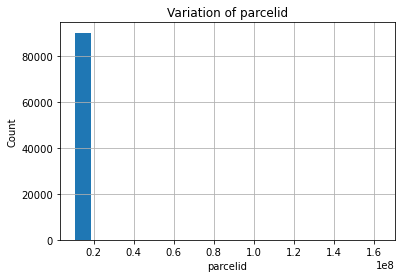

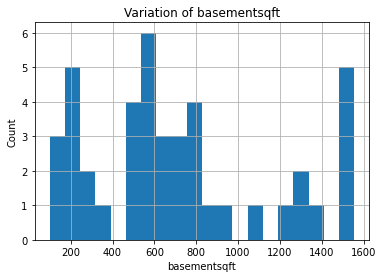

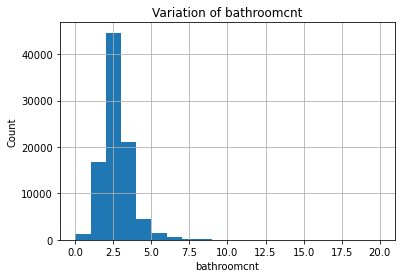

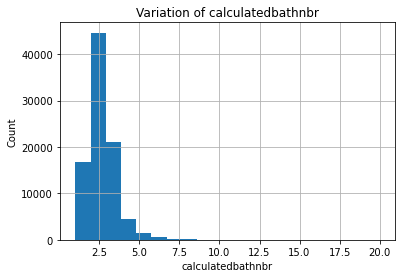

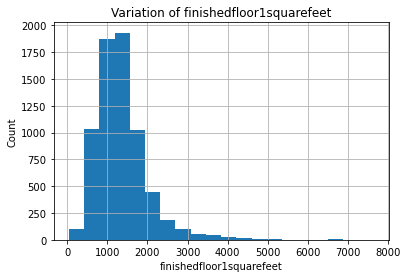

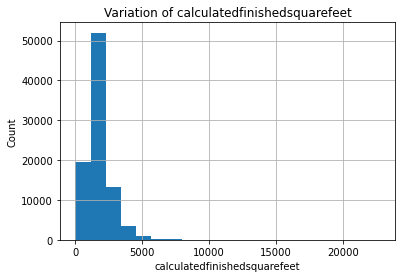

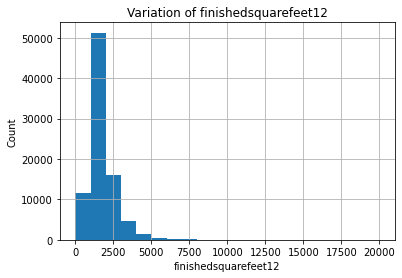

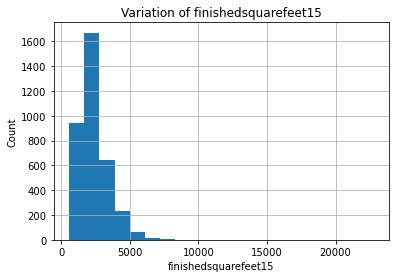

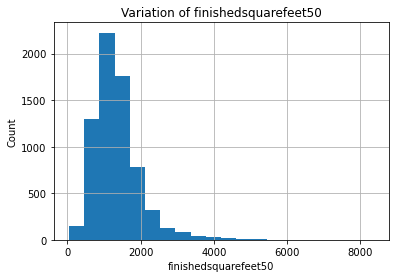

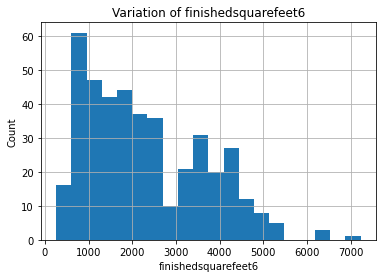

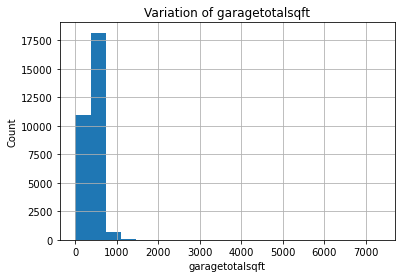

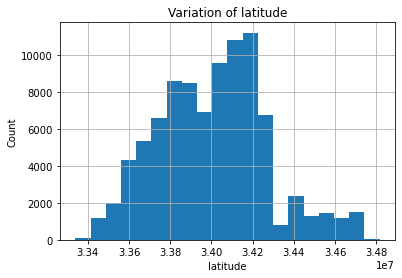

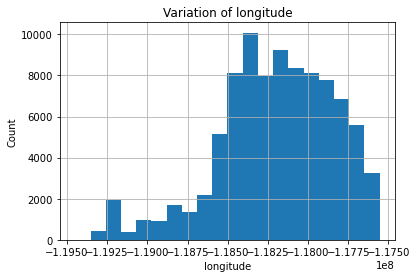

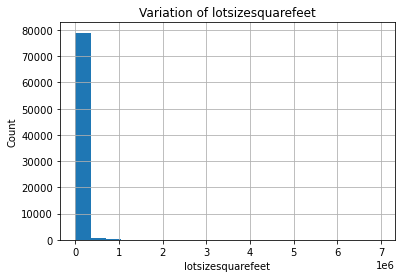

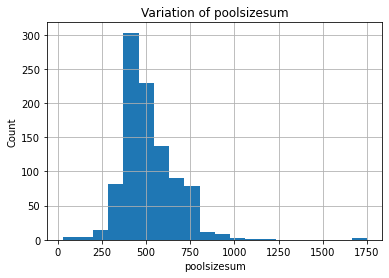

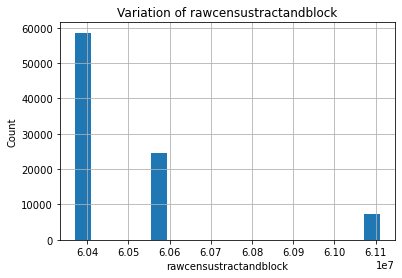

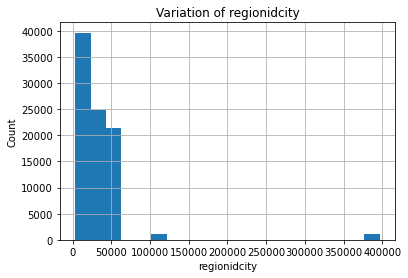

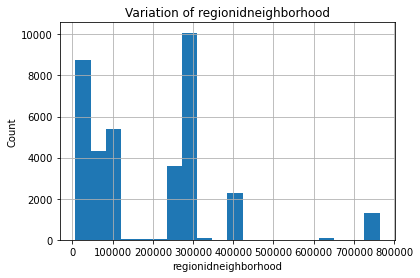

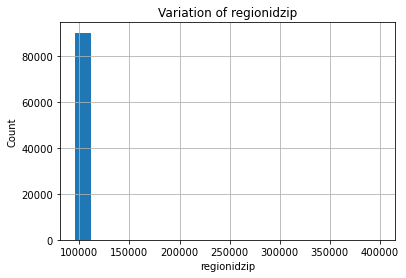

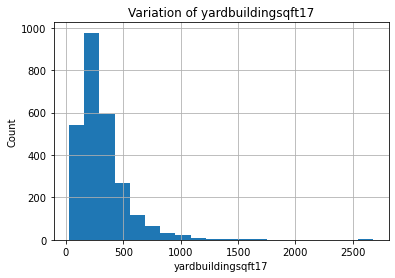

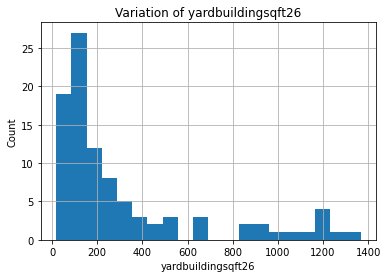

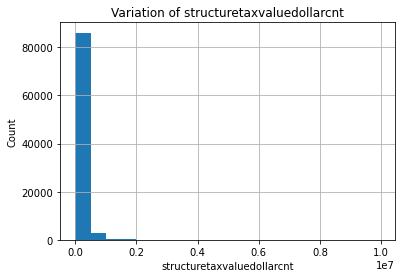

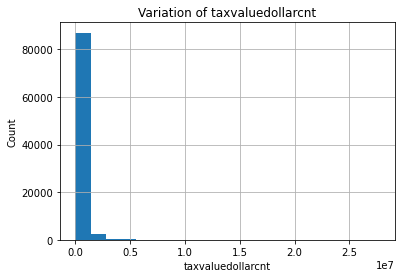

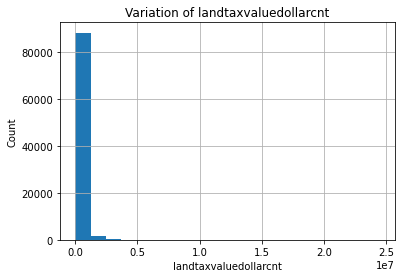

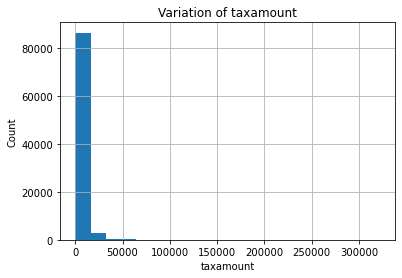

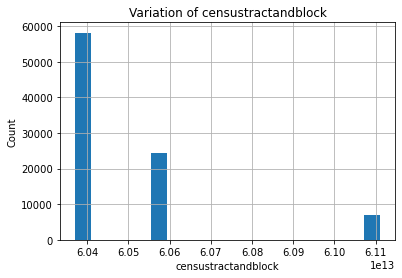

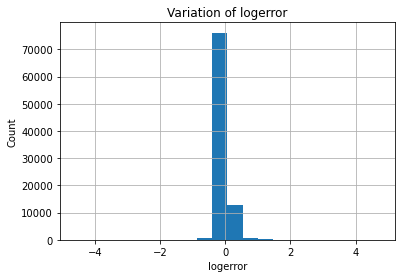

In [51]:
def log_variation(df,var):
    new_df=dummy_df.copy()
    if 0 in new_df[var].unique():
         pass
    else:
        new_df[var]=np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('log Variation of '+ var)
        plt.show()
    
for var in con_var:
    distribution_cont(dummy_df,var)

# checking outliers

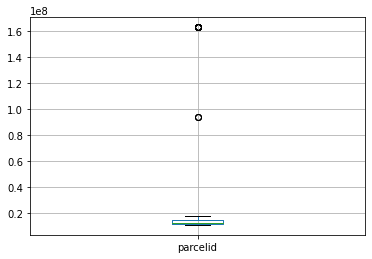

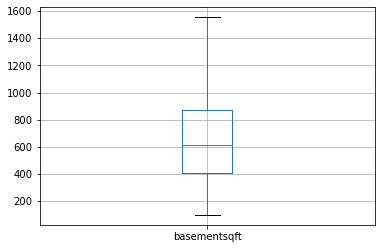

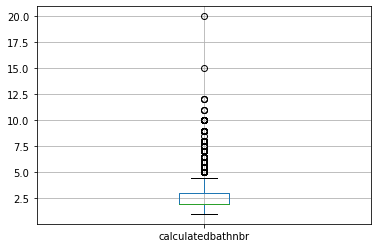

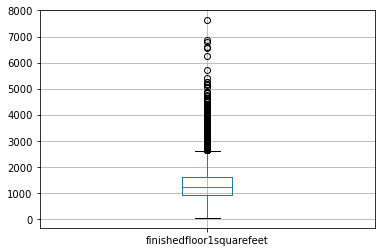

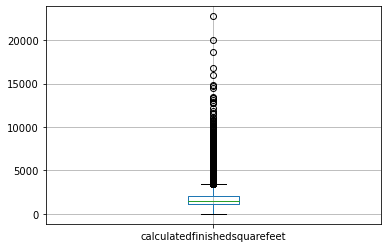

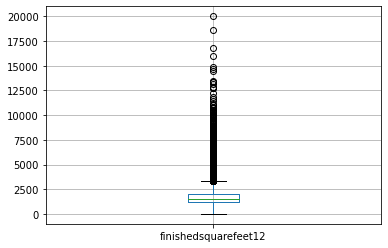

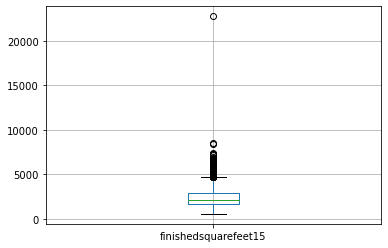

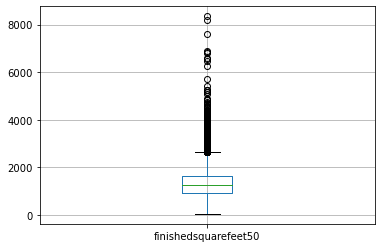

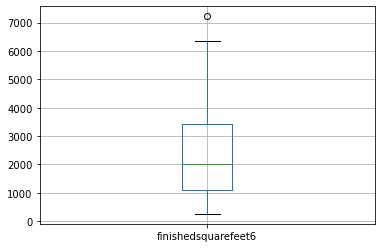

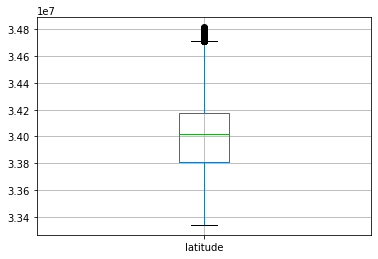

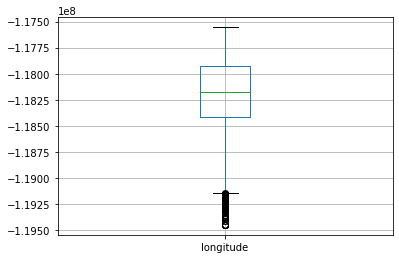

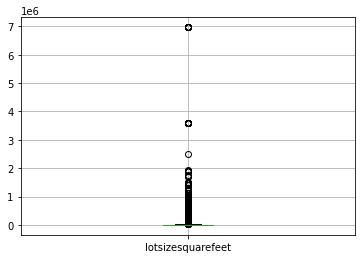

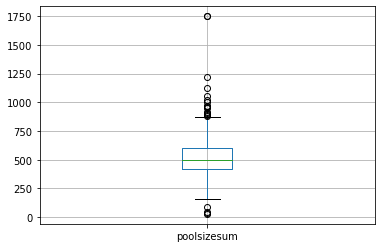

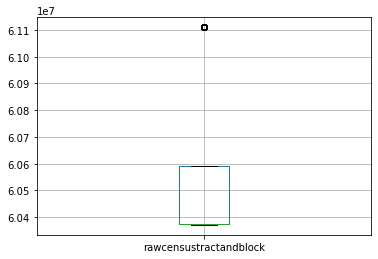

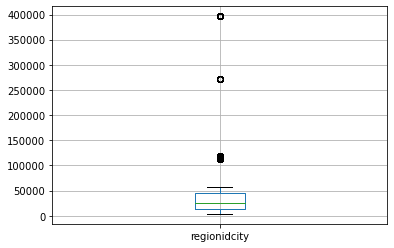

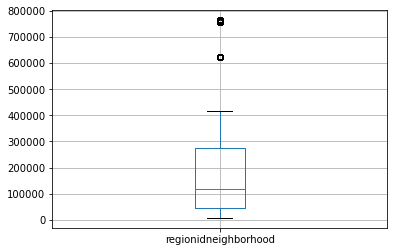

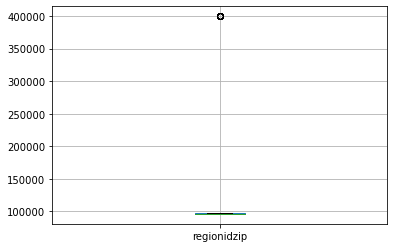

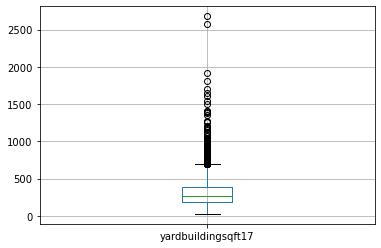

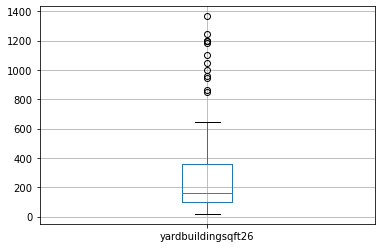

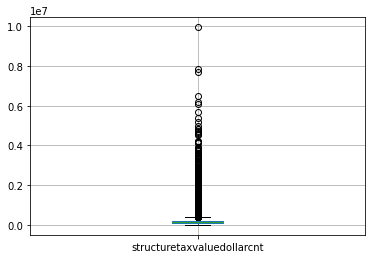

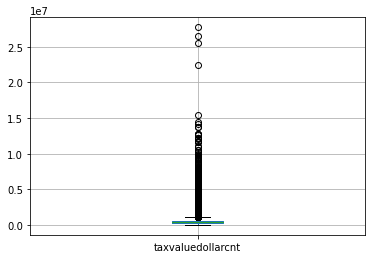

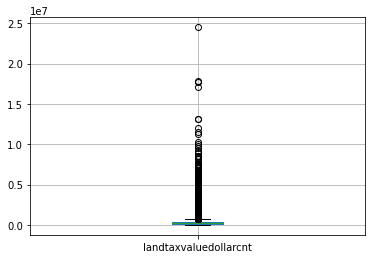

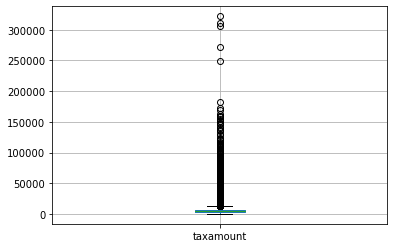

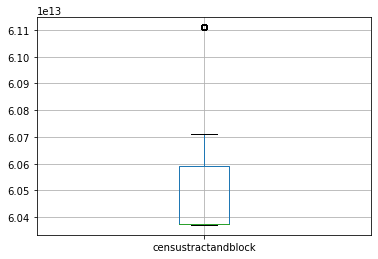

In [57]:
def check_outliers(df,var):
    new_df=dummy_df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
        new_df[var]=np.log(new_df[var])
        df.boxplot(column=var)
        plt.show()
for var in con_var:
    check_outliers(new_df,var)


In [59]:
dummy_df.to_csv('for_feature_engineering.csv', index=False)